In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import cv2
import matplotlib.patches as patches
import tensorflow as tf
import keras
from keras.layers import Flatten, Dense, Conv2D, MaxPooling2D, Dropout, Activation
from keras.models import Sequential
from keras.callbacks import ModelCheckpoint
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import json
import random
import seaborn as sns

In [2]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [3]:
# explore 'train' data

In [4]:
## load train data
meta_data = pd.read_csv(r'C:\Anaconda_Python\Python_Course_Material\2021spring_machine_learning\HW\Project\dataset\train.csv')

In [5]:
meta_data.head()

,name,x1,x2,y1,y2,classname
0,2756.png,69,126,294,392,face_with_mask
1,2756.png,505,10,723,283,face_with_mask
2,2756.png,75,252,264,390,mask_colorful
3,2756.png,521,136,711,277,mask_colorful
4,6098.jpg,360,85,728,653,face_no_mask


In [6]:
print(len(meta_data))

15412


In [7]:
meta_data.classname.unique()

array(['face_with_mask', 'mask_colorful', 'face_no_mask',
       'face_with_mask_incorrect', 'mask_surgical', 'face_other_covering',
       'scarf_bandana', 'eyeglasses', 'helmet', 'face_shield',
       'sunglasses', 'hood', 'hat', 'goggles', 'hair_net', 'hijab_niqab',
       'other', 'gas_mask', 'balaclava_ski_mask', 'turban'], dtype=object)

In [8]:
meta_data.classname.nunique()

20

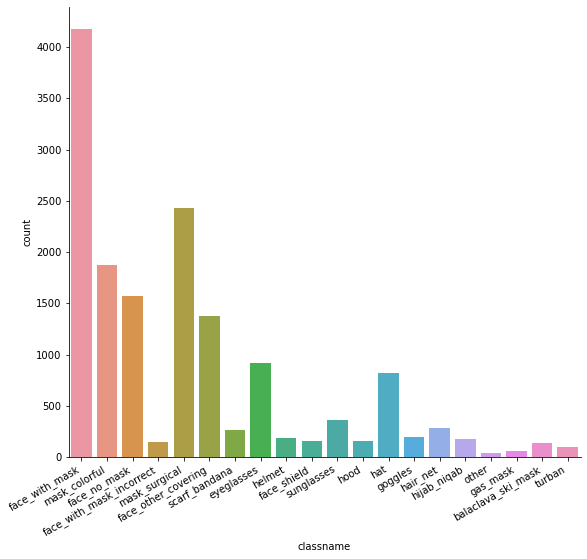

In [9]:
sns.catplot(x='classname',kind='count',data=meta_data,height=8,aspect=1).fig.autofmt_xdate()

In [10]:
## Counts of face_with_mask and face_no_mask
face_with_mask=meta_data[meta_data["classname"]=="face_with_mask"]
face_no_mask=meta_data[meta_data["classname"]=="face_no_mask"]
print("count of face with mask: "+str(len(face_with_mask))+"\ncount of face no mask: "+str(len(face_no_mask)))

count of face with mask: 4180
count of face no mask: 1569


In [11]:
#the number in [0] is the index 

In [12]:
meta_name=meta_data["name"][0] 
meta_name

'2756.png'

In [13]:
meta_data[meta_data["name"]==meta_name]

,name,x1,x2,y1,y2,classname
0,2756.png,69,126,294,392,face_with_mask
1,2756.png,505,10,723,283,face_with_mask
2,2756.png,75,252,264,390,mask_colorful
3,2756.png,521,136,711,277,mask_colorful


In [14]:
# Explore 'images' data

In [15]:
## load image data
images = r"C:\Anaconda_Python\Python_Course_Material\2021spring_machine_learning\HW\Project\dataset\images"

Text(0.5, 1.0, 'face_with_mask')

Text(0.5, 1.0, 'face_with_mask')

Text(0.5, 1.0, 'mask_colorful')

Text(0.5, 1.0, 'mask_colorful')

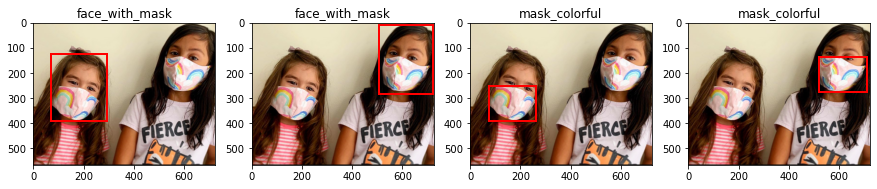

In [16]:
## plot image
def img_reg(id):
    meta_name=meta_data["name"][id]
    classname=meta_data[meta_data["name"]==meta_name]["classname"]
    reg=meta_data[meta_data["name"]==meta_name][["x1","x2","y1","y2"]]
    x1=reg["x1"][id]
    x2=reg["x2"][id]
    y1=reg["y1"][id]
    y2=reg["y2"][id]
    classname=classname[id]
    images = r"C:\Anaconda_Python\Python_Course_Material\2021spring_machine_learning\HW\Project\dataset\images"
    img=plt.imread(os.path.join(images,meta_name))
    return x1,x2,y1,y2,classname,img
# Create suubplot
fig,[ax1,ax2, ax3, ax4] = plt.subplots(nrows=1, ncols=4, figsize=(15,15))
#first image
x1,x2,y1,y2,classname,img=img_reg(0)
ax1.imshow(img)
rect = patches.Rectangle((x1,x2),y1-x1,y2-x2,linewidth=2,edgecolor='r',facecolor='none')
ax1.set_title(classname)

#second image
x1,x2,y1,y2,classname,img=img_reg(1)
ax2.imshow(img)
rect2 = patches.Rectangle((x1,x2),y1-x1,y2-x2,linewidth=2,edgecolor='r',facecolor='none')
ax2.set_title(classname)

#third image
x1,x2,y1,y2,classname,img=img_reg(2)
ax3.imshow(img)
rect3 = patches.Rectangle((x1,x2),y1-x1,y2-x2,linewidth=2,edgecolor='r',facecolor='none')
ax3.set_title(classname)

#four image
x1,x2,y1,y2,classname,img=img_reg(3)
ax4.imshow(img)
rect4 = patches.Rectangle((x1,x2),y1-x1,y2-x2,linewidth=2,edgecolor='r',facecolor='none')
ax4.set_title(classname)

ax1.add_patch(rect)
ax2.add_patch(rect2)
ax3.add_patch(rect3)
ax4.add_patch(rect4)

plt.show()

In [17]:
# Explore 'annotations' data

In [18]:
directory = r"C:\Anaconda_Python\Python_Course_Material\2021spring_machine_learning\HW\Project\dataset\annotations"

In [19]:
def getJSON(filePathandName):
    with open(filePathandName,'r') as f:
        return json.load(f)

In [20]:
jsonfiles= []
for i in os.listdir(directory):
    jsonfiles.append(getJSON(os.path.join(directory,i)))
jsonfiles[878]

{'FileName': '2756.png',
 'NumOfAnno': 4,
 'Annotations': [{'isProtected': False,
   'ID': 598039385457921920,
   'BoundingBox': [69, 126, 294, 392],
   'classname': 'face_with_mask',
   'Confidence': 1,
   'Attributes': {}},
  {'isProtected': False,
   'ID': 702410169516003712,
   'BoundingBox': [505, 10, 723, 283],
   'classname': 'face_with_mask',
   'Confidence': 1,
   'Attributes': {}},
  {'isProtected': False,
   'ID': 152706552218535680,
   'BoundingBox': [75, 252, 264, 390],
   'classname': 'mask_colorful',
   'Confidence': 1,
   'Attributes': {}},
  {'isProtected': False,
   'ID': 3262639018530855,
   'BoundingBox': [521, 136, 711, 277],
   'classname': 'mask_colorful',
   'Confidence': 1,
   'Attributes': {}}]}

In [21]:
data = []
img_size = 64
mask = ['face_with_mask']
non_mask = ["face_no_mask"]
labels={'mask':0,'without mask':1}
for i in meta_data["name"].unique():
    f = i+".json"
    for j in getJSON(os.path.join(directory,f)).get("Annotations"):
        if j["classname"] in mask:
            x,y,w,h = j["BoundingBox"]
            img = cv2.imread(os.path.join(images,i),cv2.IMREAD_GRAYSCALE) #Note cv2.IMREAD_GRAYSCALE is the key to make X.shape (5749,50,50,1). If using 1 istead of cv2.IMREAD_GRAYSCALE, will get X.shape (5749,50,50,3)
            img = img[y:h,x:w]
            img = cv2.resize(img,(img_size,img_size))
            data.append([img,labels["mask"]])
        if j["classname"] in non_mask:
            x,y,w,h = j["BoundingBox"]
            img = cv2.imread(os.path.join(images,i),cv2.IMREAD_GRAYSCALE)
            img = img[y:h,x:w]
            img = cv2.resize(img,(img_size,img_size))    
            data.append([img,labels["without mask"]])
random.shuffle(data)   

In [22]:
data[0][0]

array([[129, 110, 100, ..., 255, 255, 255],
       [ 86,  84,  77, ..., 255, 255, 255],
       [ 62,  61,  62, ..., 255, 255, 255],
       ...,
       [146, 149, 138, ...,  50,  52,  55],
       [156, 153, 146, ...,  55,  58,  62],
       [153, 153, 148, ...,  59,  64,  66]], dtype=uint8)

In [23]:
data[0][0].shape

(64, 64)

In [24]:
data[0][1]

1

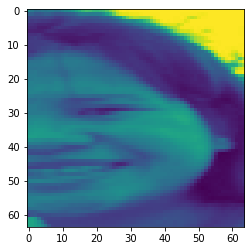

In [25]:
plt.imshow(data[0][0]) 

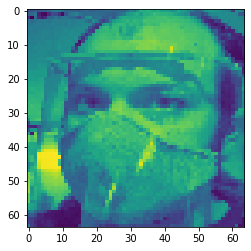

In [26]:
plt.imshow(data[1][0])

C:\Anaconda_Python\Anaconda_Software\envs\tensorflow\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:ylabel='count'>

count of face with mask: 4180
count of face no mask: 1569


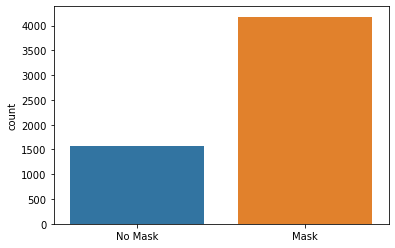

In [27]:
p = []
Nmask = 0
Nwtmask = 0
for face in data:
    if(face[1] == 0):
        Nmask +=1
        p.append("Mask")
    else:
        p.append("No Mask")
        Nwtmask +=1
sns.countplot(p)
print("count of face with mask: "+str(Nmask)+"\ncount of face no mask: "+str(Nwtmask))

In [28]:
X = []
Y = []
for features,label in data:
    X.append(features)
    Y.append(label)

In [29]:
# Normalize data
import numpy as np
img_size = 64 #通常是2的倍数
X=np.array(X)/255.0 # 255 is the range 0-1
X=X.reshape(-1,img_size, img_size, 1) # Neutral Network needs 4 dimensions; 1 is grey scaler imgages
Y=np.array(Y)
from keras.utils import np_utils
Y=np_utils.to_categorical(Y)

In [30]:
X.shape, Y.shape

((5749, 64, 64, 1), (5749, 2))

In [31]:
from keras.layers import LSTM
model=Sequential()
model.add(Conv2D(100,(3,3),input_shape=X.shape[1:],activation='relu',strides=2))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(64,(3,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Flatten())
model.add(Dense(50, activation='relu'))
model.add(Dropout(0.2))

model.add(Dense(2, activation='softmax'))

model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [32]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 31, 31, 100)       1000      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 15, 15, 100)       0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 13, 13, 64)        57664     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 6, 6, 64)          0         
_________________________________________________________________
flatten (Flatten)            (None, 2304)              0         
_________________________________________________________________
dense (Dense)                (None, 50)                115250    
_________________________________________________________________
dropout (Dropout)            (None, 50)                0

In [33]:
history = model.fit(X,Y,epochs=30,batch_size=5, verbose=1,validation_split = 0.1)

Epoch 1/30
1035/1035 [==============================] - 10s 10ms/step - loss: 0.5107 - accuracy: 0.7379 - val_loss: 0.4349 - val_accuracy: 0.8278
Epoch 2/30
1035/1035 [==============================] - 11s 11ms/step - loss: 0.4343 - accuracy: 0.7938 - val_loss: 0.4002 - val_accuracy: 0.8226
Epoch 3/30
1035/1035 [==============================] - 11s 11ms/step - loss: 0.3893 - accuracy: 0.8288 - val_loss: 0.3584 - val_accuracy: 0.8504
Epoch 4/30
1035/1035 [==============================] - 11s 11ms/step - loss: 0.3388 - accuracy: 0.8494 - val_loss: 0.4019 - val_accuracy: 0.8574
Epoch 5/30
1035/1035 [==============================] - 11s 11ms/step - loss: 0.3071 - accuracy: 0.8692 - val_loss: 0.3318 - val_accuracy: 0.8591
Epoch 6/30
1035/1035 [==============================] - 11s 11ms/step - loss: 0.2661 - accuracy: 0.8827 - val_loss: 0.2873 - val_accuracy: 0.8643
Epoch 7/30
1035/1035 [==============================] - 10s 10ms/step - loss: 0.2489 - accuracy: 0.8978 - val_loss: 0.2807 -

In [34]:
## This model is not working!!!
#model = Sequential()

#model.add(Conv2D(32, (3, 3), padding = "same", activation='relu', input_shape=(124,124,3)))
#model.add(Conv2D(64, (3, 3), activation='relu'))
#model.add(Conv2D(128, (3, 3), activation='relu'))
#model.add(MaxPooling2D(pool_size=(2,2)))
#model.add(Dropout(0.25))
 
#model.add(Flatten())
#model.add(Dropout(0.5))
#model.add(Dense(50, activation='relu'))
#model.add(Dropout(0.5))
#model.add(Dense(1, activation='sigmoid'))

#model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [35]:
pd.DataFrame(history.history)

,loss,accuracy,val_loss,val_accuracy
0,0.510742,0.737920,0.434863,0.827826
1,0.434331,0.793777,0.400169,0.822609
2,0.389251,0.828759,0.358363,0.850435
3,0.338762,0.849440,0.401873,0.857391
4,0.307149,0.869153,0.331794,0.859130
5,0.266117,0.882683,0.287252,0.864348
6,0.248933,0.897758,0.280710,0.881739
7,0.222323,0.905876,0.251803,0.892174
8,0.206853,0.912833,0.237492,0.892174
9,0.189234,0.921917,0.238839,0.907826


Text(0.5, 1.0, 'Training Accuracy vs Validation Accuracy')

Text(0, 0.5, 'Accuracy')

Text(0.5, 0, 'Epoch')

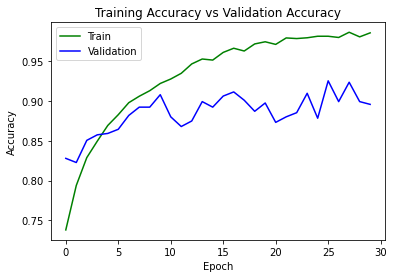

In [36]:
plt.plot(history.history['accuracy'],'g')
plt.plot(history.history['val_accuracy'],'b')
plt.title('Training Accuracy vs Validation Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

<AxesSubplot:>

Text(0, 0.5, 'accuracy')

<AxesSubplot:label='8cf82339-6d44-48ad-ab4c-f46c9915d1bf'>

Text(0, 0.5, 'loss')

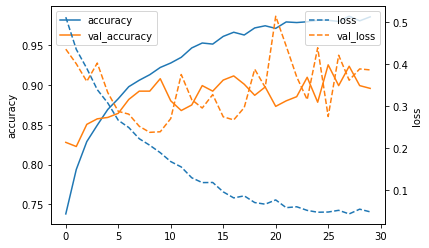

In [37]:
# To find the best Epoch numbers
df = pd.DataFrame(history.history)
df[['accuracy', 'val_accuracy']].plot()
plt.ylabel("accuracy")
df[['loss', 'val_loss']].plot(linestyle='--', ax=plt.twinx())
plt.ylabel("loss")
# we only care the orange line, where around 11-12, is the best point

In [38]:
score = model.evaluate(X, Y, verbose=0)
print("Test loss: {:.3f}".format(score[0]))
print("Test Accuracy: {:.3f}".format(score[1]))

Test loss: 0.050
Test Accuracy: 0.987


In [39]:
print(model.evaluate(X, Y))

180/180 [==============================] - 2s 14ms/step - loss: 0.0499 - accuracy: 0.9873
[0.04991455003619194, 0.9873021245002747]


In [40]:
from keras.wrappers.scikit_learn import KerasClassifier, KerasRegressor # wrappers is designed for scikit-learn
from sklearn.model_selection import GridSearchCV

def make_model(optimizer="adam", hidden_size=50):
    model = Sequential([
        Conv2D(100,(3,3),input_shape=X.shape[1:],activation='relu',strides=2),
        MaxPooling2D(pool_size=(2,2)),
        Conv2D(64,(3,3),activation='relu'),
        MaxPooling2D(pool_size=(2,2)),
        Flatten(),
        Dense(50, activation='relu'),
        Dropout(0.2),
        Dense(2, activation='softmax'),
    ])
    model.compile(optimizer=optimizer, loss="categorical_crossentropy", metrics=['accuracy'])
    return model

clf = KerasClassifier(make_model)

param_grid = {'epochs': [1, 5, 10],  # epochs is fit parameter, not in make_model!
              'hidden_size': [32, 64, 256]} # 9 different models

grid = GridSearchCV(clf, param_grid=param_grid,return_train_score=True)

In [ ]:
grid.fit(X, Y)

144/144 [==============================] - 2s 13ms/step - loss: 0.4825 - accuracy: 0.7280
Epoch 1/5
144/144 [==============================] - 6s 44ms/step - loss: 0.5416 - accuracy: 0.7265
Epoch 2/5
106/144 [=====================>........] - ETA: 1s - loss: 0.4603 - accuracy: 0.7577

In [ ]:
res = pd.DataFrame(grid.cv_results_)

In [ ]:
res

In [ ]:
res.pivot_table(index=["param_epochs", "param_hidden_size"],
                values=['mean_train_score', "mean_test_score"])

In [ ]:
grid.score(X, Y)

In [ ]:
import cv2
import numpy as np

In [ ]:
face_clsfr=cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')

source=cv2.VideoCapture(0)

labels_dict={0:'MASK',1:'NO MASK'}
color_dict={0:(0,255,0),1:(0,0,255)}

In [ ]:
while(True):

    ret,img=source.read()
    gray=cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
    faces=face_clsfr.detectMultiScale(gray,1.3,5)  

    for x,y,w,h in faces:
    
        face_img=gray[y:y+w,x:x+w]
        resized=cv2.resize(face_img,(50,50))
        normalized=resized/255.0
        reshaped=np.reshape(normalized,(1,50,50,1))
        result=grid.predict(reshaped)

        label=np.argmax(result,axis=1)[0]
      
        cv2.rectangle(img,(x,y),(x+w,y+h),color_dict[label],2)
        cv2.rectangle(img,(x,y-40),(x+w,y),color_dict[label],-1)
        cv2.putText(img, labels_dict[label], (x, y-10),cv2.FONT_HERSHEY_SIMPLEX,0.8,(255,255,255),2)
        
        
    cv2.imshow('LIVE',img)
    key=cv2.waitKey(1)
    
    if(key==27):
        break
        
cv2.destroyAllWindows()
source.release()